In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
pumps = pd.read_csv('../data/US-pumpkins.csv')
pumps.head(5) #read first 5 rows


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
pumps.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [26]:
list_of_cols = ['City Name', 'Package', 'Low Price', 'High Price', 'Date']
pumps = pumps.loc[:, list_of_cols]
pumps = pumps[pumps['Package'].str.contains('bushel', case=True, regex=True)]#case=true ==> it's case sensitive, regex=true ==> it treats bushel as regex pattern
pumps.head(5)

,City Name,Package,Low Price,High Price,Date
70,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,9/24/16
71,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,9/24/16
72,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,10/1/16
73,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,10/1/16
74,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,10/8/16


In [29]:
price = (pumps['Low Price']+pumps['High Price'])/2
month = pd.DatetimeIndex(pumps['Date']).month
newpumps = pd.DataFrame({'Month': month, 'Price':price, 'Package':pumps['Package'], 'Date':pumps['Date']})
newpumps.head(5)

,Month,Price,Package,Date
70,9,15.0,1 1/9 bushel cartons,9/24/16
71,9,18.0,1 1/9 bushel cartons,9/24/16
72,10,18.0,1 1/9 bushel cartons,10/1/16
73,10,17.0,1 1/9 bushel cartons,10/1/16
74,10,15.0,1 1/9 bushel cartons,10/8/16


In [39]:
newpumps.loc[newpumps['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
newpumps.loc[newpumps['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
newpumps.head(5)

,Month,Price,Package,Date
70,9,12.15,1 1/9 bushel cartons,9/24/16
71,9,14.58,1 1/9 bushel cartons,9/24/16
72,10,14.58,1 1/9 bushel cartons,10/1/16
73,10,13.77,1 1/9 bushel cartons,10/1/16
74,10,12.15,1 1/9 bushel cartons,10/8/16


Text(0.5, 0, 'Month')

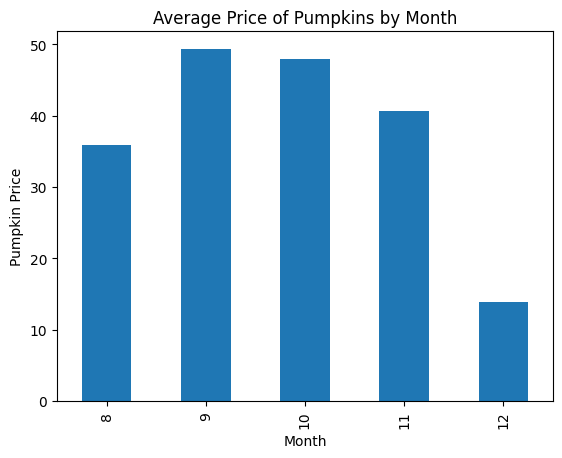

In [42]:
newpumps.groupby(['Month'])['Price'].mean().plot(kind='bar')
#here, xaxis = month 'coz it is the grouped object and serves as the index whose value would be the price
#by default, index is the x axis and the value is the price
plt.title('Average Price of Pumpkins by Month')
plt.ylabel('Pumpkin Price')
plt.xlabel('Month')